In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array([5,8,11,14,17,20,23,26,29,32,35,38])

In [ ]:
data_train_x = X[:6]
data_train_y = y[:6]
data_test_x = X[6:]
data_test_y = y[6:]


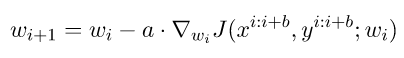

In [ ]:
# Initialize model parameters
learning_rate = 0.01
epochs = 100
batch_size = 4  # You can adjust this to your desired batch size
num_samples = len(data_train_x)
weights = np.random.rand(1)  # Initialize weights randomly
bias = np.random.rand(1)     # Initialize bias randomly

In [ ]:
def pred(batch,w,b):
  return (w*batch)+b

In [ ]:
def gradient(batch_size, X_batch, y_batch, predictions, weights, bias):
  d_weights = (-2 / batch_size) * np.dot(X_batch, (y_batch - predictions))
  d_bias = (-2 / batch_size) * np.sum(y_batch - predictions)

  # Update weights and bias
  weights -= learning_rate * d_weights
  bias -= learning_rate * d_bias
  return [weights,bias]

In [ ]:
def loss(x,y,w,b):
  avg_error = 0
  for i in range(num_samples):
    pred = x[i]*w + b
    error_i = (y[i] - pred)**2
    avg_error += error_i
  avg_error = avg_error/num_samples
  return avg_error

In [ ]:
def minibatch(epochs,X,y, weights, bias):
  loss_list = []
  for epoch in range(epochs):
    permutation = np.random.permutation(num_samples)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]

    for i in range(0, num_samples, batch_size):
        # Create mini-batch
        X_batch = X_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]

        # Compute predictions
        predictions = pred(X_batch,w[0],b)

        #gradient
        weights,bias = gradient(batch_size, X_batch, y_batch, predictions, weights, bias)

    error = loss(X,y,weights,bias)
    loss_list.append(error)

  return [weights,bias,loss_list]

In [ ]:
# Make predictions
w,b,error = minibatch(100,data_train_x, data_train_y, weights, bias)

Learned Weight: 3.044876577342393
Learned Bias: 1.8078475404392065


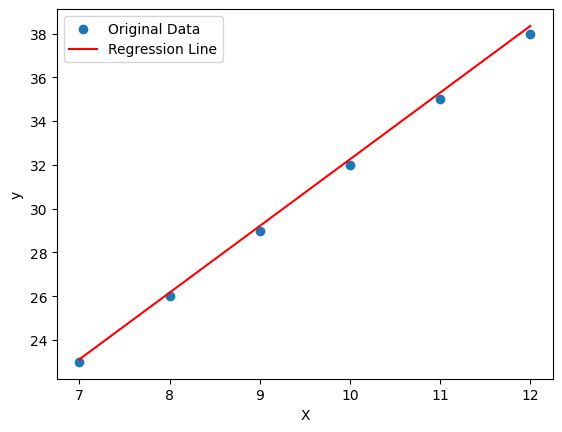

In [ ]:
predictions = w[0] * data_test_x + b

# Print the learned parameters
print("Learned Weight:", w[0])
print("Learned Bias:", b[0])

# Plot the original data and the regression line
import matplotlib.pyplot as plt

plt.scatter(data_test_x, data_test_y, label='Original Data')
plt.plot(data_test_x, predictions, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

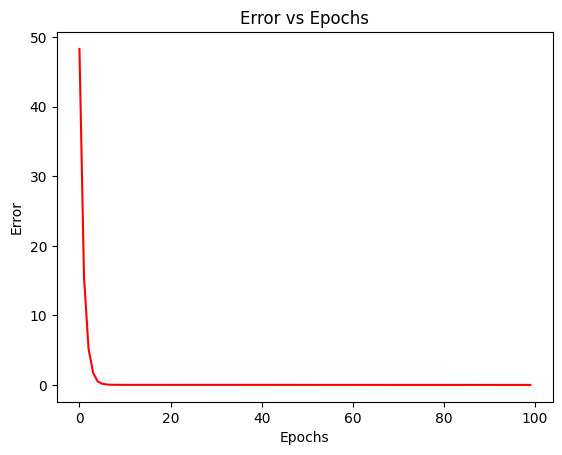

In [ ]:
plt.plot(error, color='red', label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs")
plt.show()

In [ ]:
accuracy = 1-error

print(f"Accuracy of the model is: {int(accuracy*100)} %")

Accuracy of the model is: 99 %
